# Data Science - Unit 1 Sprint 2

---

## Statistical Tests and Experiments

#### Notebook points: 17

## Part A: Statistical Analysis

### Use the following information to complete tasks 1 - 8

### Dataset description:

Anyone who is a fan of detective TV shows has watched a scene where human remains are discovered and some sort of expert is called in to determine when the person died. But is this science fiction or science fact? Is it possible to use evidence from skeletal remains to determine how long a body has been buried (a decent approximation of how long the person has been dead)?

Researchers sampled long bone material from bodies exhumed from coffin burials in two cemeteries in England. In each case, date of death and burial (and therefore interment time) was known. This data is given in the `Longbones.csv` dataset which you can find [here](https://github.com/LambdaSchool/data-science-practice-datasets/blob/main/unit_1/Longbones/Longbones.csv).

**What can we learn about the bodies that were buried in the cemetery?**

The variable names are:
* Site = Site ID, either Site 1 or Site 2
* Time = Internment time in years
* Depth = Burial depth in ft.
* Lime = Burial with Quiklime (0 = No, 1 = Yes)
* Age = Age at time of death in years
* Nitro = Nitrogen composition of the long bones in g per 100g of bone.
* Oil = Oil contamination of the grave site (0 = No contamination, 1 = Oil contamination)

*Source: D.R. Jarvis (1997). "Nitrogen Levels in Long Bones from Coffin Burials Interred for Periods of 26-90 Years," Forensic Science International, Vol85, pp199-208*

**Task 1** - Load the data

As we usually begin, let's load the data! The URL has been provided.

* load your CSV file into a DataFrame named `df`

In [1]:
# Task 1

import pandas as pd
import numpy as np

data_url = 'https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_1/Longbones/Longbones.csv'

# YOUR CODE HERE
df= pd.read_csv(data_url)

# Print out your DataFrame
df.head()

,Site,Time,Depth,Lime,Age,Nitro,Oil
0,1,88.5,7.0,1,NaN,3.88,1
1,1,88.5,NaN,1,NaN,4.00,1
2,1,85.2,7.0,1,NaN,3.69,1
3,1,71.8,7.6,1,65.0,3.88,0
4,1,70.6,7.5,1,42.0,3.53,0


**Task 1 - Test**

In [2]:
# Task 1 - Test

assert isinstance(df, pd.DataFrame), 'Have you created a DataFrame named `df`?'
assert len(df) == 42


**Task 2** - Missing data

Now, let's determine if there is any missing data in the dataset. If there is, drop the row that contains a missing value.

* Check for missing/null values and assign the sum to `num_null` - the result should be the sum of all the null values and a single integer.
* If there are null values, drop them from your dataframe. Your DataFrame should still be `df`. Note that dropping your null values may change your answer for `num_null`. Restart your Runtime/Kernel if your solution looks different from the CodeGrade answer.


In [3]:
# Task 2

# YOUR CODE HERE
num_null= df.isnull().sum().sum()
df.dropna(inplace= True)
df.reset_index(drop=True, inplace=True)
df

,Site,Time,Depth,Lime,Age,Nitro,Oil
0,1,71.8,7.60,1,65.0,3.88,0
1,1,70.6,7.50,1,42.0,3.53,0
2,1,68.0,7.00,1,28.0,3.93,0
3,1,71.6,8.00,1,35.0,3.88,0
4,1,70.2,6.00,1,44.0,3.64,0
5,1,55.5,6.00,0,29.0,3.97,0
6,1,36.3,6.50,0,48.0,3.96,0
7,1,46.5,6.50,0,35.0,3.69,0
8,1,45.5,6.50,0,34.0,3.75,0
9,1,43.0,6.50,0,38.0,3.75,0


In [4]:
df_mean= df["Nitro"].mean()

**Task 2 - Test**

In [5]:
# Task 2 - Test
# Hidden tests - you will see the results when you submit to Canvas

assert num_null == 8, "Double-check that you correctly summed the null values."


### Use the following information to complete tasks 3 - 8

The mean nitrogen composition in living individuals is **4.3g per 100g of bone**.  

We wish to use the Longbones sample to test the null hypothesis that the mean nitrogen composition per 100g of bone in the deceased is 4.3g (equal to that of living humans) vs the alternative hypothesis that the mean nitrogen composition per 100g of bone in the deceased is not 4.3g (not equal to that of living humans).

**Task 3 -** Statistical hypotheses

From the list of choices below, select the null and alternative hypotheses using the information described above.  Specify your answer in the next code block using `Answer = `.  For example, if the correct answer is choice B, you'll type `Answer = 'B'`.

A: Ho: There is no association between the nitrogen composition of living and non-living bones vs. Ha: There is an association between the nitrogen composition of living and non-living bones.

B: $H_0: \mu = 4.3$ vs. $H_a: \mu \neq 4.3$

C: $H_0: \mu_{living} \neq \mu_{dead}$ vs. $H_a: \mu_{living} = \mu_{dead}$

D: $H_0: \mu_{living} = \mu_{dead}$ vs. $H_a: \mu_{living} \neq \mu_{dead}$

In [6]:
# Task 3

# YOUR CODE HERE
Answer= 'B'


**Task 3 Test**

In [7]:
# Task 3 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 4 -** Statistical distributions

From the list of choices below, select the appropriate statistical test for the study described above.  Specify your answer in the next code block using `Answer = `.  For example, if the correct answer is choice B, you'll type `Answer = 'B'`.

A: A two-sample t-test

B: A chi-square test

C: A one-sample t-test

D: A Bayesian test

In [8]:
# Task 4

# YOUR CODE HERE
Answer = 'C'

**Task 4 Test**

In [9]:
# Task 4 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 5** - Hypothesis testing

Use a built-in Python function to conduct the statistical test you identified earlier. The scipy stats module has been imported.

* Assign the t statistic to the variable `t`
* Assign the p-value to the variable `p`

*Hint: Review the documentation to verify what it returns. You can assign the two variables in one step or two steps.*

In [10]:
# Task 5

# Use this import for your calculation
from scipy import stats

# YOUR CODE HERE
df.describe()
#rvs= stats.norm.rvs(loc= 3.796, scale= 0.18, size= 35, random_state= 42)

t, p= stats.ttest_1samp(df["Nitro"], 4.3)
print(t, p)

-16.52576582183037 8.097649978903497e-18


**Task 5 Test**

In [11]:
# Task 5 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 6**

Select the correct conclusion at the 0.05 significance level from the list of choices below. Specify your answer in the next code block using `Answer = `.  For example, if the correct answer is choice B, you'll type `Answer = 'B'`.

A: We reject the null hypothesis at the 0.05 significance level and conclude that the mean long bone nitrogen composition for skeletons is different than the mean long bone nitrogen composition in living individuals.

B: We fail to reject the null hypothesis at the 0.05 significance level and conclude that the mean long bone nitrogen composition for skeletons is different than the mean long bone nitrogen composition in living individuals.

C: We reject the null hypothesis at the 0.05 significance level and conclude that the mean long bone nitrogen composition for skeletons is the same as the mean long bone nitrogen composition in living individuals..

D: We fail to reject the null hypothesis at the 0.05 significance level and conclude that the mean long bone nitrogen composition for skeletons is the same as the mean long bone nitrogen composition in living individuals.


In [12]:
# Task 6

Answer= 'A'


**Task 6 Test**

In [13]:
# Task 6 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 7** - Confidence Interval

Calculate a 95% confidence interval for the mean nitrogen composition in the longbones of a deceased individual using the t.interval function.

* Assign the lower end of the confidence interval to the variable `l`
* Assign the upper end of the confidence interval to the variable `u`

*Hint: You will need to calculate other statistics to complete the confidence interval calculation. These variables can be named whatever you like - just make sure to name your confidence interval variables as specified above.*

In [14]:
# Task 7

# Use this import for your calculation
from scipy.stats import t

# YOUR CODE HERE
deg_free = df.shape[0] - 1
t_star = t.ppf(q= .975, df= deg_free)
df_sem = df["Nitro"].sem()
df_margin_err = t_star * df_sem
l= df_mean - df_margin_err
u= df_mean + df_margin_err
print(l,u)


3.7340209520249212 3.8579790479750775


**Task 7 Test**

In [15]:
# Task 7 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 8**

Select the correct interpretation of the 95% confidence interval from the statements below. Specify your answer in the next code block using `Answer = `.  For example, if the correct answer is choice B, you'll type `Answer = 'B'`.

A: In 95% of samples, the mean longbone nitrogen composition in skeletons is between 3.73 and 3.86 grams per 100g of bone.

B: We are 95% confident that the population mean longbone nitrogen composition in skeletons is between 3.73 and 3.86 grams per 100g of bone.

C: We are 95% confident that the sample mean longbone nitrogen composition in skeletons is between 3.73 and 3.86 grams per 100g of bone.

D: We are 95% confident that the mean longbone nitrogen composition in skeletons is between 34.3 grams per 100g of bone.


In [16]:
# Task 8

# YOUR CODE HERE
Answer ='B'


**Task 8 Test**

In [17]:
# Task 8 - Test
# Hidden tests - you will see the results when you submit to Canvas

## Part B: A/B Testing

### Use the following information to complete tasks 9 - 18

### A/B Testing and Udacity

Udacity is an online learning platform geared toward tech professionals who want to develop skills in programming, data science, etc.  These classes are intensive - both for the students and instructors - and the learning experience is best when students are able to dedicate enough time to the classes and there is not a lot of student churn.

Udacity wished to determine if presenting potential students with a screen that would remind them of the time commitment involved in taking a class would decrease the enrollment of students who were unlikely to succeed in the class.

At the time of the experiment, when a student selected a course,  they were taken to the course overview page and presented with two options: "start free trial", and "access course materials".

If the student clicked "start free trial", they were asked to enter their credit card information and were enrolled in a free trial for the paid version of the course (which would covert to a paid membership after 14 days).

If the student clicked "access course materials", they could view the videos and take the quizzes for free but could not access all the features of the course such as coaching.

*Credit*: [Udacity A/B testing final project example](https://https://www.udacity.com/course/ab-testing--ud257?irclickid=W0WQs22htxyLTIxwUx0Mo3YgUkEzM2Rn81NW2g0&irgwc=1&utm_source=affiliate&utm_medium=&aff=27795&utm_campaign=_khm68yp1xv02l1pj0mzy8__)

**Here's the experiment:** Udacity tested a change where if the student clicked "start free trial", they were asked how much time they had available to devote to the course.

If the student indicated 5 or more hours per week, they would be taken through the checkout process as usual. If they indicated fewer than 5 hours per week, a message would appear indicating that Udacity courses usually require a greater time commitment for successful completion and suggesting that the student might like to access the course materials for free.

At this point, the student would have the option to continue enrolling in the free trial, or access the course materials for free instead.

**Now we wish to see if there was an association between the screen the potential student viewed and whether or not the student enrolled in the paid version of the course.**

The Udacity data is linked below and is in a non-tidy format.  We'll be focusing on the number of enrolling customers who convert to paying customers.

You don't need to do anything with the **non-tidy** data in this Challenge; we're sharing it here so you can get an idea of what data looks like *before* we clean it.

In [18]:
# Run this cell to load the "non-tidy" data
import pandas as pd
import numpy as np

# Load data
data_url = 'https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_1/Udacity%20AB%20testing%20data/AB%20testing%20data.csv'
ABtest_ = pd.read_csv(data_url)

print(ABtest_.shape)
ABtest_.head()

(999, 10)


,Date,C-Pageviews,C-Clicks,C-Enrollments,C-Payments,E-Pageviews,E-Clicks,E-Enrollments,E-Payments,Unnamed: 9
0,"Sat, Oct 11",7723.0,687.0,134.0,70.0,7716.0,686.0,105.0,34.0,NaN
1,"Sun, Oct 12",9102.0,779.0,147.0,70.0,9288.0,785.0,116.0,91.0,NaN
2,"Mon, Oct 13",10511.0,909.0,167.0,95.0,10480.0,884.0,145.0,79.0,NaN
3,"Tue, Oct 14",9871.0,836.0,156.0,105.0,9867.0,827.0,138.0,92.0,NaN
4,"Wed, Oct 15",10014.0,837.0,163.0,64.0,9793.0,832.0,140.0,94.0,NaN


Now, here is the enrollment and payment data in tidy format.  You can see how I set it up [here](https://colab.research.google.com/drive/1eSOjXoj9MpO04h24wnHXRWGE2jhuhw65?usp=sharing).

In [19]:
# Run this cell to load the "tidy" data
data_url = 'https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_1/Udacity%20AB%20testing%20data/AB_test_payments.csv'

ABtest = pd.read_csv(data_url, skipinitialspace=True, header=0)

print(ABtest.shape)
ABtest.head()

(7208, 3)


,UserID,Group,Payment
0,0,Control,1
1,1,Control,1
2,2,Control,1
3,3,Control,1
4,4,Control,1


### Dataset information

The "tidy" data has the following values for the columns:

* Group = Control or Experimental depending on the screen viewed
* Payment = 0 if the individual did not not enroll as a paying customer, 1 = if the individual did enroll as a paying customer

**Our goal is to determine if there is an association between the screen that a potential student viewed as she was signing up for a course and whether or not she converted to a paying customer.**

**Task 9 -** Statistical hypotheses

From the list of choices below, select the null and alternative hypotheses using the experiment information described above.  Specify your answer in the next code block using `Answer = `.  For example, if the correct answer is choice B, you'll type `Answer = 'B'`.

A: Ho: There is no association between the screen a customer viewed and whether the student became a paying customer vs. Ha: There is an association between the screen a customer viewed and whether the student became a paying customer.

B: Ho: There is an association between the screen a customer viewed and whether the student became a paying customer vs. Ha: There is no association between the screen a customer viewed and whether the student became a paying customer.

C: $H_0: \mu_{experiment} \neq \mu_{control}$ vs. $H_a: \mu_{experiment} = \mu_{control}$

D: $H_0: \mu_{experiment} = \mu_{control}$ vs. $H_a: \mu_{experiment} \neq \mu_{control}$

In [21]:
# Task 9

# YOUR CODE HERE
Answer = 'A'


**Task 9 Test**

In [22]:
# Task 9 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 10** - Frequency and relative frequency

Calculate the frequency and relative frequency of viewing the control version of the website and the experimental version of the website.

* Use `.value_counts()`
* Assign the frequency table the name `group_freq`
* Assign the relative frequency table the name `group_pct`.  Multiply by 100 to convert the proportions in the table to percents.

In [25]:
# Task 10

# YOUR CODE HERE

group_freq = ABtest['Group'].value_counts()
group_pct = ABtest['Group'].value_counts(normalize= True) *100

**Task 10 Test**

In [26]:
# Task 10 - Test
# Hidden tests - you will see the results when you submit to Canvas


**Task 11** - Frequency and relative frequency

Calculate the frequency and relative frequency of converting to a paying customer.

* Use `.value_counts()`
* Assign the frequency table the name `pay_freq`
* Assign the relative frequency table the name `pay_pct`.  Multiply by 100 to convert the proportions in the table to percents.

In [29]:
# Task 11

# YOUR CODE HERE
pay_freq = ABtest['Payment'].value_counts()
pay_pct = ABtest['Payment'].value_counts(normalize = True) * 100
pay_pct

1    55.188679
0    44.811321
Name: Payment, dtype: float64

**Task 11 Test**

In [30]:
# Task 11 - Test
# Hidden tests - you will see the results when you submit to Canvas


**Task 12** - Joint distribution

Calculate the joint distribution of experimental condition and conversion to a paying customer.

* Use the `Group` feature as the index variable
* Name the results of the joint distribution `joint_dist`

In [34]:
# Task 12

# YOUR CODE HERE
import pandas as pd
joint_dist = pd.crosstab(index = ABtest["Group"], columns = ABtest["Payment"])
joint_dist


Payment,0,1
Group,,
Control,1752,2033
Experiment,1478,1945


**Task 12 Test**

In [35]:
# Task 12 - Test
# Hidden tests - you will see the results when you submit to Canvas


**Task 13** - Marginal distribution

Add the table margins to the joint distribution of experimental condition and conversion to a paying customer.

* Use the `Group` feature as the index variable
* Name the results of the distribution `marginal_dist`

In [37]:
# Task 13

# YOUR CODE HERE
marginal_dist = pd.crosstab(index = ABtest["Group"], columns = ABtest["Payment"], margins = True)

**Task 13 Test**

In [38]:
# Task 13 - Test
# Hidden tests - you will see the results when you submit to Canvas


**Task 14 -** Conditional distribution

Calculate the distribution of payment conversion conditional on the text the individual saw when he or she was signing up for Udacity.

* Use the `Group` feature as the index variable
* Name the results of the distribution `conditional_dist` and **make sure to multiple the result by 100**

In [41]:
# Task 14

# YOUR CODE HERE
conditional_dist = pd.crosstab(index = ABtest["Group"], columns = ABtest["Payment"], normalize = 'index') * 100
conditional_dist

Payment,0,1
Group,,
Control,46.287979,53.712021
Experiment,43.178498,56.821502


**Task 14 Test**

In [42]:
# Task 14 - Test
# Hidden tests - you will see the results when you submit to Canvas


**Task 15 -** Statistical distributions

Identify the appropriate statistical test to determine if there is an association between the screen that a potential student viewed as she was signing up for a course and whether or not he or she converted to a paying customer.  Specify your answer in the next code block using `Answer = `.  For example, if the correct answer is choice B, you'll type `Answer = 'B'`.

A: A two-sample t-test

B: A Bayesian test

C: A one-sample t-test

D: A chi-square test

In [44]:
# Task 15

# YOUR CODE HERE
Answer = 'D'


**Task 15 Test**

In [45]:
# Task 15 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 16** - Hypothesis testing

Conduct the hypothesis test you identified in Task 15.
* Assign the p-value to the variable `p`

*Hint: The `chi2_contingency()` function returns more than one parameter - make sure to read the documentation to assign the correct one to your p-value*

In [47]:
# Task 16

from scipy.stats import chi2_contingency

# YOUR CODE HERE
chi, p, dof, exp = chi2_contingency(joint_dist)
p

0.008608736615463934

**Task 16 Test**

In [48]:
# Task 16 - Test
# Hidden tests - you will see the results when you submit to Canvas


**Task 17**

Select the correct conclusion at the 0.05 significance level from the list of choices below. Specify your answer in the next code block using `Answer = `.  For example, if the correct answer is choice B, you'll type `Answer = 'B'`.

A: We reject the null hypothesis at the 0.05 significance level and conclude that there is no association between the screen a student viewed and if the student became a paying customer.

B: We fail to reject the null hypothesis at the 0.05 significance level and conclude that there is no association between the screen a student viewed and if the student became a paying customer.

C: We reject the null hypothesis at the 0.05 significance level and conclude that there is a statistically significant association between the screen a student viewed and if the student became a paying customer.

D: We fail to reject the null hypothesis at the 0.05 significance level and conclude that there is a statistically significant association between the screen a student viewed and if the student became a paying customer.


In [50]:
# Task 17

# YOUR CODE HERE
Answer = 'C'


**Task 17 Test**

In [49]:
# Task 17 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 18** - Visualization

Draw a side-by-side barplot illustrating the distribution of conversion by experimental group.

This task will not be autograded - but it is part of completing the challenge.

<Axes: xlabel='Group'>

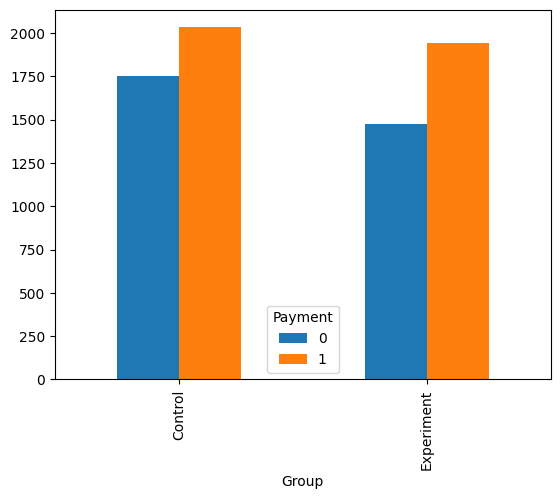

In [51]:
#Task 18

# Create your plot here
import matplotlib.pyplot as plt
import seaborn as sns

# YOUR CODE HERE
joint_dist.plot(kind = 'bar')